In [1]:
#This script introduces how to use convolution to blur the image, including Gaussian Blur, etc.

#本脚本主要运用卷积，来完成将图片模糊化，包括高斯模糊等。

#このスクリプトは主に畳み込みを用いて、ガウスぼかしを含む画像のぼかし処理を実施する方法を紹介する。

#Este script presenta cómo utilizar la convolución para difuminar la figura, incluyendo el desenfoque gaussiano, entre otros.

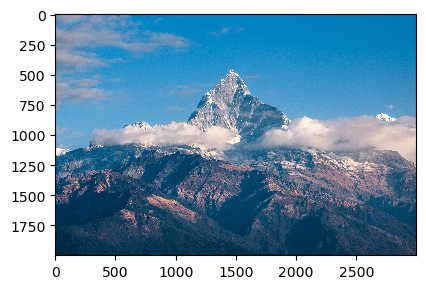

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

picture = imread(r'C:\Users\Ariesmuse\Desktop\test.jpg').astype('uint8')
plt.figure(num=None, figsize=(5, 3), dpi=100)
imshow(picture);

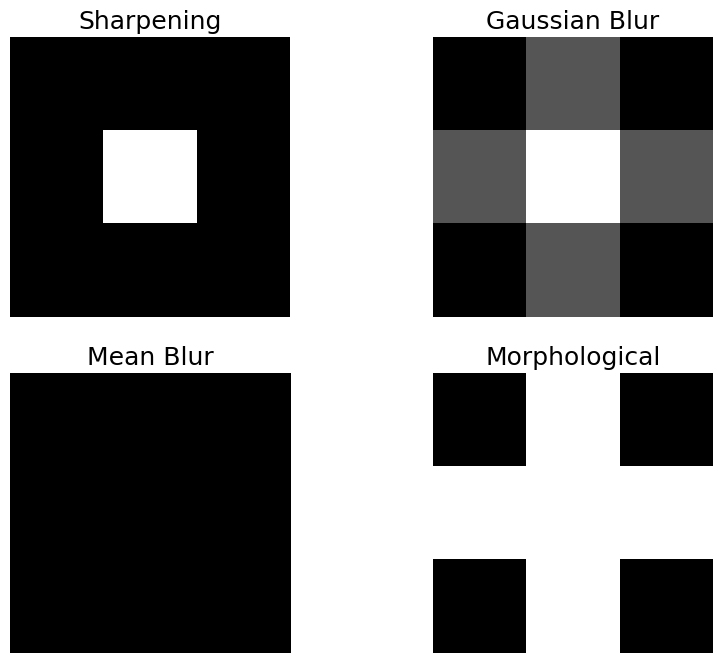

In [12]:
#The general blur effects include sharpening, Gaussian Blur, Mean Blur, Circular Structuring Element Morphological Filtering and so on. When the Gaussian Blur is used, to ensure that the RGB parameters always fall within the range 
#of [0,1]*255, the convolution kernel is normalized. If the kernel is not normalized, the parameters may go beyond the range after several interations. On the contrary, in the operation of sharpening, the edges of the images need 
#to be emphasized. Therefore, the central value of the kernel is always larger than the edge values. If the sharpening kernel is normalized, the sharpening effect may be weakened.

#一些常见的模糊效果包括锐化，高斯模糊，均值模糊，圆形结构元素形态学滤波等。在使用高斯模糊时，为了确保图像RGB的取值范围在[0，1]*255之中，因此卷积核进行了归一化。如果卷积核没有进行归一化，在若干次迭代后会导致数值超出这个范围。而在锐化操作中，由于图像的
#边缘需要被强调，因此卷积核的中心数值总是大于边缘数值。而如果对锐化卷积核进行均一化，则会削弱锐化效果。

#一般的なぼかし効果には、シャープ化、ガウスぼかし、平均ぼかし、円形構造要素形態学フィルタリングなどが含まれる。ガウスぼかしを使う際に、画像のRGBパラメータが常に[0，1]*255という範囲内にあるを確保するため、畳み込みカーネルへの規格化が必要である。もしカーネ
#ルが規格化されないと、イテレーションを繰り返すと、パラメータがこの範囲を超え、エラーを起こす場合もある。一方、シャープ化操作には、画像の枠を強調するために、カーネルの中心値がいつも端の値より大きいとする。シャープ化カーネルを規格化すれば、シャープ効果を
#弱める場合がある。

#Los efectos generales de desenfoque incluyen el sharpening, el desenfoque gaussiano, el desenfoque promedio, el filtrado morfológico del elemento estructurante circular, entre otros. Cuando se utiliza el desenfoque gaussiano, se 
#normaliza el kernel de convolución para asegurarse de que los parámetros RGB siempre se encuentren dentro del rango de [0,1]*255. Si el kernel no está normalizado, los parámetros pueden salirse del rango después de varias 
#iteraciones. Por el contrario, en la operación de sharpening, se necesitan enfatizar los bordes de las figuras. Por lo tanto, el valor central del kernel es siempre mayor que los valores de los bordes. Si el kernel de afilado se 
#normaliza, puede que el efecto de afilado se debilite.

# Sharpening
sharpening = np.array([[-1, -1, -1],
                    [-1, 9, -1],
                    [-1, -1, -1]])
                    
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1.0, 2.0, 1.0],
                                  [2.0, 4.0, 2.0],
                                  [1.0, 2.0, 1.0]])

# Mean Blur 
meanblur = (1 / 9.0) * np.array([[1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0],
                                 [1.0, 1.0, 1.0]])

#Circular Structuring Element Morphological Filtering
morphological = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]])

fig, ax = plt.subplots(2,2, figsize = (10,8))
ax[0,0].imshow(sharpening, cmap='gray')
ax[0,0].set_title(f'Sharpening', fontsize = 18)
    
ax[0,1].imshow(gaussian, cmap='gray')
ax[0,1].set_title(f'Gaussian Blur', fontsize = 18)

ax[1,0].imshow(meanblur, cmap='gray')
ax[1,0].set_title(f'Mean Blur', fontsize = 18)

ax[1,1].imshow(morphological, cmap='gray')
ax[1,1].set_title(f'Morphological', fontsize = 18)
    
[axi.set_axis_off() for axi in ax.ravel()];

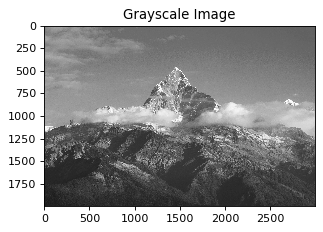

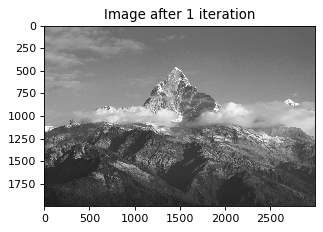

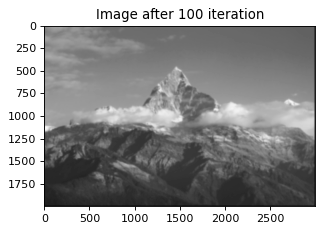

In [24]:
#When convolving a colour image, it is usually not possible to perform the convolution directly because the image consists of three parameters: red, green, and blue. Generally speaking, there are two methods of realizing the 
#convolution: the first is converting a colour image to a black and white image. The RGB parameters will be represented by only one value: grayscale value, and the grayscale value is then used to perform the convolutione. The 
#other method is to separate the red, green, and blue color channels of the color image and convolve them separately, then combine them to complete the image blurring operation.

#在对彩色图像进行卷积时，由于图像由RGB三个参数构成，因此通常无法直接进行卷积。一般来说，有两个方案来完成图像的卷积操作：一是将彩色图像转变为黑白图像，那么图像的RGB参数将仅由灰度这一个值来表示，然后再对灰度进行卷积。另一种方案是将彩色图片的红，绿，蓝
#三个色彩通道拆开分别进行卷积，最后再合并来完成图像的模糊操作。

#カラー画像を畳み込む場合、通常は画像がRGB三つのパラメータから構成されているため、直接畳み込みを行うことができない。一般的に、二つの方法がある：一つ目はカラー画像を白黒画像に変換することである。この場には画像のRGBがグレースケールに標示され、その後グレー
#スケールに畳み込みを行う。二つ目はカラー画像のレッド、グリーンとブルーを分けてそれぞれ畳み込んでから合わせて画像のぼかしを完了する。

#Al realizar la convolución en una imagen en color, por lo general no es posible realizar la convolución directamente debido a que la imagen está compuesta por tres parámetros: rojo, verde y azul. Generalmente, existen dos métodos 
#para realizar la convolución: el primero consiste en convertir la imagen en color a una imagen en blanco y negro. Los parámetros RGB se representarán por un solo valor: el valor de escala de grises, y luego se utilizará este valor 
#para realizar la convolución. El otro método es separar los canales de color rojo, verde y azul de la imagen en color y convolucionarlos por separado, y luego combinarlos para completar la operación de desenfoque de la imagen.

picture_grey = rgb2gray(picture)
plt.figure(num=None, figsize=(5, 3), dpi=80)
plt.title("Grayscale Image")
imshow(picture_grey);

def convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image
convolved_image = convolver(picture_grey, gaussian, 1)
plt.figure(num=None, figsize=(5, 3), dpi=80)
plt.title("Image after 1 iteration")
imshow(convolved_image);

convolved_image = convolver(picture_grey, gaussian, 100)
plt.figure(num=None, figsize=(5, 3), dpi=80)
plt.title("Image after 100 iteration")
imshow(convolved_image);

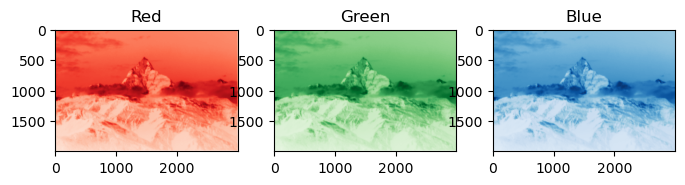

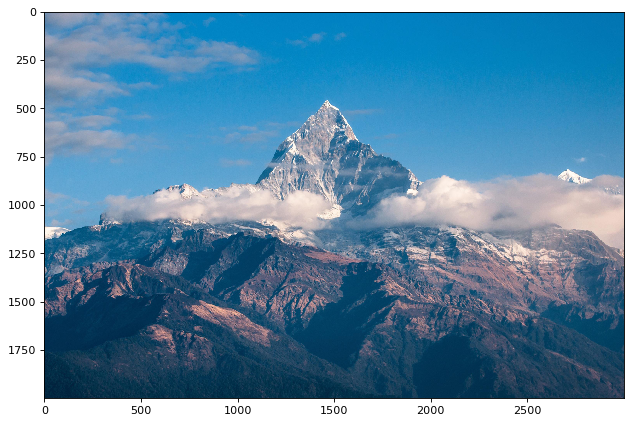

In [28]:
#Here is the script how to seperate RGB channels and combine again.

def rgb(image, kernel, iterations = 1):
    image_r = convolver(image[:,:,0], kernel, iterations)
    image_g = convolver(image[:,:,1], kernel, iterations)
    image_b = convolver(image[:,:,2], kernel, iterations)
    
    reformed_image = np.dstack((np.rint(abs(image_r)), 
                                np.rint(abs(image_g)), 
                                np.rint(abs(image_b)))) / 255
    return reformed_image

fig, ax = plt.subplots(1,3, figsize = (8,6))
    
ax[0].imshow(abs(convolved_image), cmap='Reds')
ax[0].set_title(f'Red', fontsize = 12)
    
ax[1].imshow(abs(convolved_image), cmap='Greens')
ax[1].set_title(f'Green', fontsize = 12)
    
ax[2].imshow(abs(convolved_image), cmap='Blues')
ax[2].set_title(f'Blue', fontsize = 12)
fig.subplots_adjust(hspace=0.5)
    
plt.figure(num=None, figsize=(8, 6), dpi=80)
rgb_gauss = convolver_rgb(picture, gaussian, 1)
imshow(rgb_gauss);

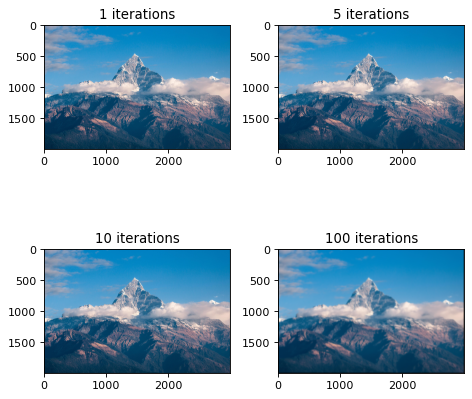

In [29]:
plt.figure(figsize=(6, 6), dpi=80)

for i, n in enumerate([1, 5, 10, 100]):
    rgb_gauss = rgb(picture, gaussian, n)
    plt.subplot(2, 2, i+1)
    plt.imshow(rgb_gauss)
    plt.title(f'{n} iterations')
    
plt.tight_layout()
plt.show()